## `Berchmans Kevin S`
## `215229107`

### Set-7 Movie sentiment prediction using LSTM on Keras IMDB data

In [1]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten, Dropout
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Bidirectional
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras_preprocessing.sequence import pad_sequences

## Load IMDB from Keras dataset

In [2]:
# Vocabulary size is 2000
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",num_words=num_words,skip_top=0,
                                                      maxlen=None,seed=113,start_char=1,oov_char=2,index_from=3)

In [3]:
X_train.shape

(25000,)

In [4]:
y_train.shape

(25000,)

In [5]:
X_test.shape

(25000,)

In [6]:
y_test.shape

(25000,)

In [7]:
print("X_train.size:", X_train.size," X_test.size:", X_test.size)

X_train.size: 25000  X_test.size: 25000


In [8]:
print("(y_train.size:",y_train.size," y_test.size:", y_test.size)

(y_train.size: 25000  y_test.size: 25000


Review length: 
Mean 238.71 words (176.493674)


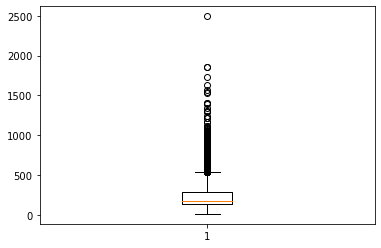

In [9]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X_train]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [10]:
max_review_length = 250

X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

## Create and compile model

In [11]:
epochs = 1
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [12]:
embedding_vector_length = 32
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=num_words, output_dim=embedding_vector_length, input_length=max_review_length))
model_rnn.add(Dropout(0.2))
model_rnn.add(LSTM(32))
model_rnn.add(Dense(units=256, activation='relu'))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(units=1, activation='sigmoid'))
model_rnn.summary()
model_rnn.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 32)           320000    
                                                                 
 dropout (Dropout)           (None, 250, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 256)               8448      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 337,025
Trainable params: 337,025
Non-trai

## Fit model

In [13]:
train_history = model_rnn.fit(X_train, y_train, batch_size=32,epochs=1, verbose=2, validation_split=0.2)

625/625 - 16s - loss: 0.6931 - accuracy: 0.5066 - val_loss: 0.6930 - val_accuracy: 0.5036 - 16s/epoch - 25ms/step


In [14]:
train_history2 = model_rnn.fit(X_train, y_train, batch_size=32,epochs=2, verbose=2, validation_split=0.2)

Epoch 1/2
625/625 - 15s - loss: 0.6930 - accuracy: 0.5110 - val_loss: 0.6929 - val_accuracy: 0.5120 - 15s/epoch - 23ms/step
Epoch 2/2
625/625 - 15s - loss: 0.6929 - accuracy: 0.5250 - val_loss: 0.6929 - val_accuracy: 0.5098 - 15s/epoch - 23ms/step


In [17]:
train_history3 = model_rnn.fit(X_train, y_train, batch_size=32,epochs=3, verbose=2, validation_split=0.2)

Epoch 1/3
625/625 - 15s - loss: 0.6929 - accuracy: 0.5116 - val_loss: 0.6929 - val_accuracy: 0.5150 - 15s/epoch - 24ms/step
Epoch 2/3
625/625 - 15s - loss: 0.6929 - accuracy: 0.5251 - val_loss: 0.6929 - val_accuracy: 0.5150 - 15s/epoch - 23ms/step
Epoch 3/3
625/625 - 15s - loss: 0.6929 - accuracy: 0.5238 - val_loss: 0.6929 - val_accuracy: 0.5156 - 15s/epoch - 24ms/step


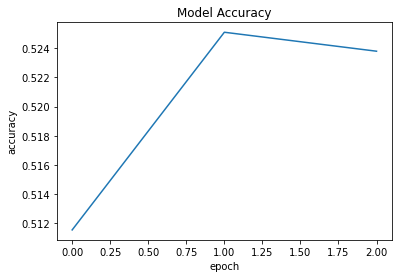

In [18]:
plt.plot(train_history3.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

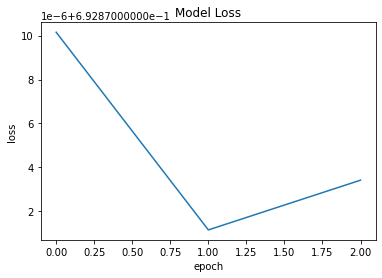

In [19]:
plt.plot(train_history3.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [20]:
print(model_rnn.evaluate(X_test, y_test, verbose=1))

782/782 [==============================] - 7s 9ms/step - loss: 0.6929 - accuracy: 0.5198
[0.6928631067276001, 0.5198400020599365]


### Model 2

In [21]:
epochs = 5
learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [22]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_vector_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 32)           320000    
                                                                 
 dropout_2 (Dropout)         (None, 250, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 256)               8448      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 337,025
Trainable params: 337,025
Non-tr

In [23]:
history11= model.fit(X_train, y_train, batch_size=32,epochs=5, verbose=2, validation_split=0.2)

Epoch 1/5
625/625 - 15s - loss: 0.6931 - accuracy: 0.4983 - val_loss: 0.6930 - val_accuracy: 0.5258 - 15s/epoch - 25ms/step
Epoch 2/5
625/625 - 15s - loss: 0.6930 - accuracy: 0.5038 - val_loss: 0.6929 - val_accuracy: 0.5142 - 15s/epoch - 23ms/step
Epoch 3/5
625/625 - 14s - loss: 0.6929 - accuracy: 0.5132 - val_loss: 0.6928 - val_accuracy: 0.5492 - 14s/epoch - 23ms/step
Epoch 4/5
625/625 - 14s - loss: 0.6929 - accuracy: 0.5175 - val_loss: 0.6927 - val_accuracy: 0.5234 - 14s/epoch - 23ms/step
Epoch 5/5
625/625 - 14s - loss: 0.6928 - accuracy: 0.5177 - val_loss: 0.6927 - val_accuracy: 0.5352 - 14s/epoch - 23ms/step


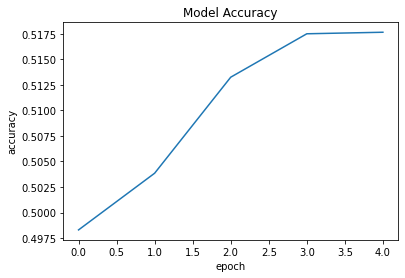

In [24]:
plt.plot(history11.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

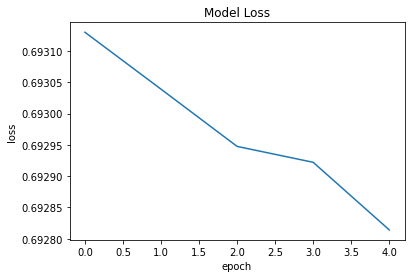

In [25]:
plt.plot(history11.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [32]:
epochs = 20
learning_rate = 0.0001
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [33]:
embedding_vector_length = 32
model_rnn1 = Sequential()
model_rnn1.add(Embedding(input_dim=num_words, output_dim=embedding_vector_length, input_length=max_review_length))
model_rnn1.add(Dropout(0.2))
model_rnn1.add(LSTM(32))
model_rnn1.add(Dense(units=256, activation='relu'))
model_rnn1.add(Dropout(0.2))
model_rnn1.add(Dense(units=1, activation='sigmoid'))
model_rnn1.summary()
model_rnn1.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 250, 32)           320000    
                                                                 
 dropout_6 (Dropout)         (None, 250, 32)           0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_6 (Dense)             (None, 256)               8448      
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 337,025
Trainable params: 337,025
Non-tr

In [ ]:
history_rnn1= model_rnn1.fit(X_train, y_train, batch_size=32,epochs=20, verbose=2, validation_split=0.2)

Epoch 1/20
625/625 - 16s - loss: 0.6932 - accuracy: 0.4827 - val_loss: 0.6932 - val_accuracy: 0.4832 - 16s/epoch - 25ms/step
Epoch 2/20
625/625 - 14s - loss: 0.6932 - accuracy: 0.4879 - val_loss: 0.6932 - val_accuracy: 0.4872 - 14s/epoch - 23ms/step
Epoch 3/20
625/625 - 14s - loss: 0.6932 - accuracy: 0.4866 - val_loss: 0.6932 - val_accuracy: 0.4934 - 14s/epoch - 23ms/step
Epoch 4/20
625/625 - 14s - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0.6932 - val_accuracy: 0.4928 - 14s/epoch - 23ms/step
Epoch 5/20
625/625 - 14s - loss: 0.6931 - accuracy: 0.4983 - val_loss: 0.6932 - val_accuracy: 0.4976 - 14s/epoch - 23ms/step
Epoch 6/20
625/625 - 14s - loss: 0.6931 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.4980 - 14s/epoch - 23ms/step
Epoch 7/20
625/625 - 14s - loss: 0.6931 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5002 - 14s/epoch - 23ms/step
Epoch 8/20
625/625 - 15s - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6931 - val_accuracy: 0.5020 - 15s/epoch - 23ms/step


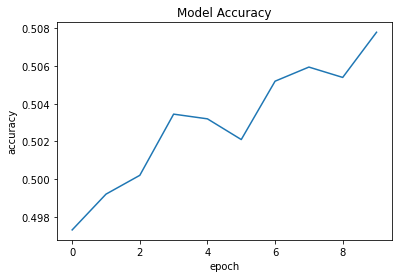

In [29]:
plt.plot(history_rnn1.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

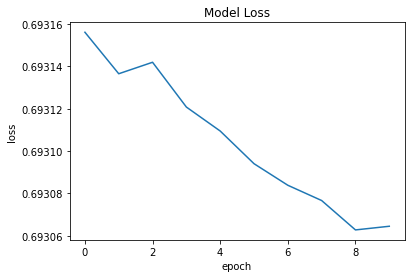

In [30]:
plt.plot(history_rnn1.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [31]:
print(model_rnn1.evaluate(X_test, y_test, verbose=1))

782/782 [==============================] - 7s 9ms/step - loss: 0.6931 - accuracy: 0.5026
[0.6930680274963379, 0.502560019493103]
